### Desafío 3: Elaboración de un modelo de clasificación
#### Etapa 4 - Se prueba llevar a cabo el modelo implementando con el dataset balanceado con undersampling

In [102]:
#Se importa la funcionalidad necesaria
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [103]:
#Lectura del archivo
df=pd.read_csv('Df_CyT_us.csv')
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,sexo,producciones_ult_anio,prod_año_anterior,prod_2_años_anteriores,prod_3_años_anteriores,max_grado_academico,gran_area_experticia,area_experticia,disciplina_experticia,tipo_personal,condicion_docente,ded_horaria_docente,clase_cargo_docente,categoria_conicet,Presento_ultimo_año,rango_edad
0,F,0,0,1,1,Universitario de grado,HUMANIDADES,Lengua y Literatura,Estudios Generales de Literatura,DOCENTE,Interino,De 0 hasta 19 horas,Jefe de trabajos prácticos,No pertenece a Conicet,0,"(20, 30]"
1,F,0,0,0,1,Universitario de grado,CIENCIAS NATURALES Y EXACTAS,Ciencias Químicas,Química Orgánica,DOCENTE,Regular o por concurso,De 0 hasta 19 horas,Ayudante Docente A,No pertenece a Conicet,0,"(30, 40]"
2,F,0,0,0,0,Universitario de grado,CIENCIAS SOCIALES,Psicología,Otras Psicología,OTRO PERSONAL DE LA INSTITUCION,no docente,0,no docente,No pertenece a Conicet,0,"(60, 70]"
3,M,0,0,0,0,Universitario de grado,INGENIERÍAS Y TECNOLOGÍAS,Ingeniería de los Materiales,Recubrimientos y Películas,BECARIO DE I+D,Interino,De 0 hasta 19 horas,Ayudante de trabajos prácticos de primera,No pertenece a Conicet,0,"(30, 40]"
4,F,0,1,7,4,Universitario de posgrado/doctorado,CIENCIAS NATURALES Y EXACTAS,Ciencias Físicas,Otras Ciencias Físicas,INVESTIGADOR,Regular o por concurso,40 horas o más,Profesor asociado,Investigador independiente,0,"(40, 50]"


In [104]:
df.columns

Index(['sexo', 'producciones_ult_anio', 'prod_año_anterior',
       'prod_2_años_anteriores', 'prod_3_años_anteriores',
       'max_grado_academico', 'gran_area_experticia', 'area_experticia',
       'disciplina_experticia', 'tipo_personal', 'condicion_docente',
       'ded_horaria_docente', 'clase_cargo_docente', 'categoria_conicet',
       'Presento_ultimo_año', 'rango_edad'],
      dtype='object')

In [105]:
#Se generan dummies para sexo 
df_dummies = pd.get_dummies(df['sexo'], prefix='sexo',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='sexo',inplace=True)

In [106]:
#Se generan dummies para rango_edad 
df_dummies = pd.get_dummies(df['rango_edad'], prefix='edad',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='rango_edad',inplace=True)

In [107]:
#Se generan dummies para tipo_personal
df_dummies = pd.get_dummies(df['tipo_personal'], prefix='t_personal',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='tipo_personal',inplace=True)

In [108]:
#Se generan dummies para condicion_docente
df_dummies = pd.get_dummies(df['condicion_docente'], prefix='cond_docente',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='condicion_docente',inplace=True)

In [109]:
#Se generan dummies para ded_horaria_docente
df_dummies = pd.get_dummies(df['ded_horaria_docente'], prefix='ded_horaria',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='ded_horaria_docente',inplace=True)

In [110]:
#Se generan dummies para max_grado_academico
df_dummies = pd.get_dummies(df['max_grado_academico'], prefix='grado_acad',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='max_grado_academico',inplace=True)

In [111]:
#Se generan dummies para categoria_conicet
df_dummies = pd.get_dummies(df['categoria_conicet'], prefix='cat_conicet',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='categoria_conicet',inplace=True)

In [112]:
#Se generan dummies para clase_cargo_docente
df_dummies = pd.get_dummies(df['clase_cargo_docente'], prefix='clase_cargo_docente',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='clase_cargo_docente',inplace=True)

#### 1. Se prueban diferentes modelos para la tabla que considera Gran Area experticia

In [113]:
#Se prueba un primer modelo tomando de las opciones de área la más abarcativa (gran area experticia)
#Se generan dummies para 'gran_area_experticia'
df_dummies = pd.get_dummies(df['gran_area_experticia'], prefix='area_exp',drop_first=True)
df_gran_area=pd.concat([df,df_dummies], axis=1)
df_gran_area.drop(columns='gran_area_experticia',inplace=True)

In [114]:
#Se define la matriz target y la matriz de features
X_ga=df_gran_area.drop(columns=['producciones_ult_anio','area_experticia', 'disciplina_experticia',
       'Presento_ultimo_año'])

y_ga =df_gran_area['Presento_ultimo_año']

In [115]:
# Hacemos el split entre train y test
X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(X_ga, y_ga, test_size = 0.33)

In [116]:
#Modelo con KNN = 50
model_KNN_50_ga = KNeighborsClassifier(n_neighbors=50)
model_KNN_50_ga.fit(X_train_ga,y_train_ga)
y_pred_KNN_50_ga = model_KNN_50_ga.predict(X_test_ga)
confusion_matrix(y_test_ga, y_pred_KNN_50_ga)
print(accuracy_score(y_test_ga, y_pred_KNN_50_ga))
print(recall_score(y_test_ga, y_pred_KNN_50_ga))
print(precision_score(y_test_ga, y_pred_KNN_50_ga))

0.7848294263388603
0.7467171717171717
0.810692254969157


In [117]:
#Modelo con KNN = 10
model_KNN_10_ga = KNeighborsClassifier(n_neighbors=10)
model_KNN_10_ga.fit(X_train_ga,y_train_ga)
y_pred_KNN_10_ga = model_KNN_10_ga.predict(X_test_ga)
confusion_matrix(y_test_ga, y_pred_KNN_10_ga)
print(accuracy_score(y_test_ga, y_pred_KNN_10_ga))
print(recall_score(y_test_ga, y_pred_KNN_10_ga))
print(precision_score(y_test_ga, y_pred_KNN_10_ga))

0.7793659869131567
0.722979797979798
0.8174161313347609


In [118]:
#Modelo con KNN = 100
model_KNN_100_ga = KNeighborsClassifier(n_neighbors=100)
model_KNN_100_ga.fit(X_train_ga,y_train_ga)
y_pred_KNN_100_ga = model_KNN_100_ga.predict(X_test_ga)
confusion_matrix(y_test_ga, y_pred_KNN_100_ga)
print(accuracy_score(y_test_ga, y_pred_KNN_100_ga))
print(recall_score(y_test_ga, y_pred_KNN_100_ga))
print(precision_score(y_test_ga, y_pred_KNN_100_ga))

0.7839400292230481
0.7468434343434344
0.8090548488578854


In [119]:
#Modelo con KNN = 500
model_KNN_500_ga = KNeighborsClassifier(n_neighbors=500)
model_KNN_500_ga.fit(X_train_ga,y_train_ga)
y_pred_KNN_500_ga = model_KNN_500_ga.predict(X_test_ga)
confusion_matrix(y_test_ga, y_pred_KNN_500_ga)
print(accuracy_score(y_test_ga, y_pred_KNN_500_ga))
print(recall_score(y_test_ga, y_pred_KNN_500_ga))
print(precision_score(y_test_ga, y_pred_KNN_500_ga))

0.7783495330665142
0.732449494949495
0.8089527262585413


In [120]:
#Logistic regression C=1e10
modelo_LR_1e10_ga =  LogisticRegression(penalty='l1',C=1e10)
modelo_LR_1e10_ga.fit(X_train_ga,y_train_ga)
y_pred_LR_1e10_ga=modelo_LR_1e10_ga.predict(X_test_ga)
modelo_LR_1e10_ga.predict_proba(X_test_ga)

print(accuracy_score(y_test_ga, y_pred_LR_1e10_ga))
print(recall_score(y_test_ga, y_pred_LR_1e10_ga))
print(precision_score(y_test_ga, y_pred_LR_1e10_ga))


0.791563433072867
0.7544191919191919
0.8172616605115579


In [121]:
#Logistic regression C=1

modelo_LR_1_ga =  LogisticRegression(penalty='l1',C=1)
modelo_LR_1_ga.fit(X_train_ga,y_train_ga)
y_pred_LR_1_ga=modelo_LR_1_ga.predict(X_test_ga)
modelo_LR_1_ga.predict_proba(X_test_ga)

print(accuracy_score(y_test_ga, y_pred_LR_1_ga))
print(recall_score(y_test_ga, y_pred_LR_1_ga))
print(precision_score(y_test_ga, y_pred_LR_1_ga))


0.7921987167270186
0.7553030303030303
0.8177717019822283


In [134]:
#Logistic regression C=100
modelo_LR_100_ga =  LogisticRegression(penalty='l2',C=100)
modelo_LR_100_ga.fit(X_train_ga,y_train_ga)

y_pred_LR_100_ga=modelo_LR_100_ga.predict(X_test_ga)

modelo_LR_100_ga.predict_proba(X_test_ga)

print(accuracy_score(y_test_ga, y_pred_LR_100_ga))
print(recall_score(y_test_ga, y_pred_LR_100_ga))
print(precision_score(y_test_ga, y_pred_LR_100_ga))


0.786735277301315
0.7200757575757576
0.8334064007014468


In [135]:
#Dado que, de todos los modelos probados, la Regresión Logística para la base balanceada con undersampling fue la que 
#mejor resultados arrojó, se busca mejorar ese modelo.
#Se estandarizan las variables y se aplica gridsearch

X_train_ga['prod_año_anterior']=scaler.fit_transform(X_train_ga[['prod_año_anterior']])
X_train_ga['prod_2_años_anteriores']=scaler.fit_transform(X_train_ga[['prod_2_años_anteriores']])
X_train_ga['prod_3_años_anteriores']=scaler.fit_transform(X_train_ga[['prod_3_años_anteriores']])

X_test_ga['prod_año_anterior']=scaler.transform(X_test_ga[['prod_año_anterior']])
X_test_ga['prod_2_años_anteriores']=scaler.transform(X_test_ga[['prod_2_años_anteriores']])
X_test_ga['prod_3_años_anteriores']=scaler.transform(X_test_ga[['prod_3_años_anteriores']])

modelo_LR_ga =  LogisticRegression()
hyperparameters = {'C': np.logspace(0, 4, 8), 
                   'penalty': ['l1', 'l2']}

clasificador = GridSearchCV(modelo_LR_ga, hyperparameters, cv=5, verbose=0)
mejor_modelo_LR_ga = clasificador.fit(X_train_ga, y_train_ga)
print('Mejor Penalización:', mejor_modelo_LR_ga.best_estimator_.get_params()['penalty'])
print('Mejor C:', mejor_modelo_LR_ga.best_estimator_.get_params()['C'])
mejor_modelo_LR_ga.best_score_



Mejor Penalización: l1
Mejor C: 1.0


0.7918140000625841

In [136]:
# Se calculan los scores

modelo_LR_1_ga =  LogisticRegression(penalty='l1',C=1)
modelo_LR_1_ga.fit(X_train_ga,y_train_ga)

y_pred_LR_1_ga=modelo_LR_1_ga.predict(X_test_ga)
modelo_LR_1_ga.predict_proba(X_test_ga)

print(accuracy_score(y_test_ga, y_pred_LR_1_ga))
print(recall_score(y_test_ga, y_pred_LR_1_ga))
print(precision_score(y_test_ga, y_pred_LR_1_ga))


0.7871799758592212
0.7200757575757576
0.8342598010532475


In [137]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_ga, y_pred_LR_1_ga))

             precision    recall  f1-score   support

          0       0.75      0.86      0.80      7821
          1       0.83      0.72      0.77      7920

avg / total       0.79      0.79      0.79     15741



#### 2. Se prueba el mejor modelo que resultó de Gran Area con Area Experticia

In [138]:
#Para el modelo que mejor nos dio se prueba poniendo el área de expertise en lugar del gran área de expertise
#Se generan dummies para 'area_experticia'
df_dummies = pd.get_dummies(df['area_experticia'], prefix='area_exp',drop_first=True)
df_area=pd.concat([df,df_dummies], axis=1)
df_area.drop(columns='area_experticia',inplace=True)

In [139]:
#Se define la matriz target y la matriz de features
X_a=df_area.drop(columns=['producciones_ult_anio','gran_area_experticia', 'disciplina_experticia',
       'Presento_ultimo_año'])

y_a =df_area['Presento_ultimo_año']

In [140]:
# Hacemos el split entre train y test
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size = 0.33)

In [141]:
#Logistic regression C=1 con variables estanarizadas

X_train_a['prod_año_anterior']=scaler.fit_transform(X_train_a[['prod_año_anterior']])
X_train_a['prod_2_años_anteriores']=scaler.fit_transform(X_train_a[['prod_2_años_anteriores']])
X_train_a['prod_3_años_anteriores']=scaler.fit_transform(X_train_a[['prod_3_años_anteriores']])

X_test_a['prod_año_anterior']=scaler.transform(X_test_a[['prod_año_anterior']])
X_test_a['prod_2_años_anteriores']=scaler.transform(X_test_a[['prod_2_años_anteriores']])
X_test_a['prod_3_años_anteriores']=scaler.transform(X_test_a[['prod_3_años_anteriores']])

modelo_LR_1_a =  LogisticRegression(penalty='l1',C=1)
modelo_LR_1_a.fit(X_train_a,y_train_a)

y_pred_LR_1_a=modelo_LR_1_a.predict(X_test_a)
modelo_LR_1_a.predict_proba(X_test_a)

print(accuracy_score(y_test_a, y_pred_LR_1_a))
print(recall_score(y_test_a, y_pred_LR_1_a))
print(precision_score(y_test_a, y_pred_LR_1_a))

0.7910552061495457
0.7456050955414013
0.8191742477256823


#### 3. Se prueba el mejor modelo que resultó de Gran Area con Disciplina Experticia

In [142]:
#Para el modelo que mejor nos dio se prueba poniendo la disciplina expertise en lugar del gran área de expertise
#Se generan dummies para 'area_experticia'
df_dummies = pd.get_dummies(df['disciplina_experticia'], prefix='disc_exp',drop_first=True)
df_disc=pd.concat([df,df_dummies], axis=1)
df_disc.drop(columns='disciplina_experticia',inplace=True)

In [143]:
#Se define la matriz target y la matriz de features
X_disc=df_disc.drop(columns=['producciones_ult_anio','gran_area_experticia', 'area_experticia',
       'Presento_ultimo_año'])

y_disc =df_disc['Presento_ultimo_año']

In [144]:
# Hacemos el split entre train y test
X_train_disc, X_test_disc, y_train_disc, y_test_disc = train_test_split(X_disc, y_disc, test_size = 0.33)

In [145]:
#Logistic regression C=1 con variables estanarizadas

X_train_disc['prod_año_anterior']=scaler.fit_transform(X_train_disc[['prod_año_anterior']])
X_train_disc['prod_2_años_anteriores']=scaler.fit_transform(X_train_disc[['prod_2_años_anteriores']])
X_train_disc['prod_3_años_anteriores']=scaler.fit_transform(X_train_disc[['prod_3_años_anteriores']])

X_test_disc['prod_año_anterior']=scaler.transform(X_test_disc[['prod_año_anterior']])
X_test_disc['prod_2_años_anteriores']=scaler.transform(X_test_disc[['prod_2_años_anteriores']])
X_test_disc['prod_3_años_anteriores']=scaler.transform(X_test_disc[['prod_3_años_anteriores']])

modelo_LR_1_disc =  LogisticRegression(penalty='l1',C=1)
modelo_LR_1_disc.fit(X_train_disc,y_train_disc)

y_pred_LR_1_disc=modelo_LR_1_disc.predict(X_test_disc)
modelo_LR_1_disc.predict_proba(X_test_disc)

print(accuracy_score(y_test_disc, y_pred_LR_1_disc))
print(recall_score(y_test_disc, y_pred_LR_1_disc))
print(precision_score(y_test_disc, y_pred_LR_1_disc))

0.7878787878787878
0.7339155001926287
0.8185333715267832


In [146]:
#El Scrore que más nos importa es el de precisión
#Analizamos los resultados:

print('Gran Area expertis -> Precision Score: ',round(precision_score(y_test_ga, y_pred_LR_1_ga),2),
      ', Features: ',X_train_ga.shape[1])

print('Area expertis -> Precision Score: ',round(precision_score(y_test_a, y_pred_LR_1_a),2),
      ', Features: ',X_train_a.shape[1])

print('Disciplina expertis -> Precision Score: ',round(precision_score(y_test_disc, y_pred_LR_1_disc),2),
      ', Features: ',X_train_disc.shape[1])



Gran Area expertis -> Precision Score:  0.83 , Features:  97
Area expertis -> Precision Score:  0.82 , Features:  133
Disciplina expertis -> Precision Score:  0.82 , Features:  326


0.7871799758592212


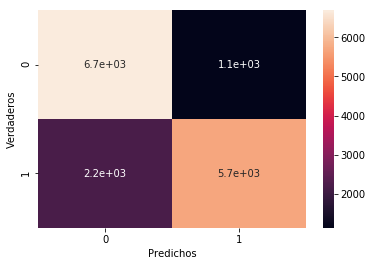

In [147]:
# Elaboramos la matriz de confusión:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test_ga, y_pred_LR_1_ga)

sns.heatmap(confusion_matrix(y_test_ga, y_pred_LR_1_ga), annot=True)

print(accuracy_score(y_test_ga, y_pred_LR_1_ga))
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

#### 4. Curva ROC

In [148]:
y_probs_logit = modelo_LR_1_ga.predict_proba(X_test_ga)
fpr_log,tpr_log,thr_log = roc_curve(y_test_ga, y_probs_logit[:,1])
df_RL = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
df_RL.head()

,fpr,tpr,thr
0,0.000000,0.000126,1.000000
1,0.000000,0.007702,0.999932
2,0.000128,0.007702,0.999931
3,0.000128,0.009848,0.999854
4,0.000256,0.009848,0.999842


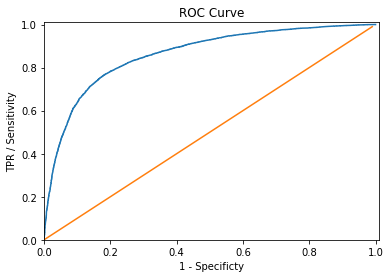

In [149]:
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_RL['fpr'],df_RL['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

In [150]:
coef=pd.DataFrame(X_test_ga.columns,columns=['Feature'])
coef['ponderador']=modelo_LR_1_ga.coef_.reshape(97,1)

In [151]:
coef.sort_values(by='ponderador',ascending=False)

,Feature,ponderador
0,prod_año_anterior,1.609989
4,"edad_(20, 30]",0.861152
42,clase_cargo_docente_Asistente principal,0.735291
83,clase_cargo_docente_Profesor invitado,0.731472
45,clase_cargo_docente_Auxiliar de segunda categoría,0.494556
82,clase_cargo_docente_Profesor instructor,0.487541
5,"edad_(30, 40]",0.469592
1,prod_2_años_anteriores,0.461261
24,grado_acad_Universitario de posgrado/doctorado,0.459389
37,clase_cargo_docente_Asistente de primera,0.398251


In [152]:
#Logistic regression C=1 con variables estandarizadas

X_ga['prod_año_anterior']=scaler.fit_transform(X_ga[['prod_año_anterior']])
X_ga['prod_2_años_anteriores']=scaler.fit_transform(X_ga[['prod_2_años_anteriores']])
X_ga['prod_3_años_anteriores']=scaler.fit_transform(X_ga[['prod_3_años_anteriores']])


modelo =  LogisticRegression(penalty='l1',C=1)
modelo.fit(X_ga,y_ga)

y_pred=modelo.predict(X_ga)

print(accuracy_score(y_ga, y_pred))
print(recall_score(y_ga, y_pred))
print(precision_score(y_ga, y_pred))

0.7936810767747076
0.7665730219296406
0.8105160489448484


0.7936810767747076


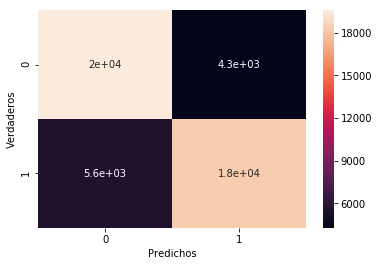

In [153]:
# Elaboramos la matriz de confusión:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_ga, y_pred)

sns.heatmap(confusion_matrix(y_ga, y_pred), annot=True)

print(accuracy_score(y_ga, y_pred))
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [154]:
print('Gran Area expertis -> Precision Score: ',round(precision_score(y_ga, y_pred),2),
      ', Features: ',X_ga.shape[1])


Gran Area expertis -> Precision Score:  0.81 , Features:  97


In [155]:
y_pred.shape

(47698,)

In [156]:

confusion_matrix(y_ga, y_pred)

array([[19575,  4274],
       [ 5567, 18282]])

In [157]:
y_probs_logit = modelo.predict_proba(X_ga)
fpr_log,tpr_log,thr_log = roc_curve(y_ga, y_probs_logit[:,1])
df_RL = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
df_RL.head()

,fpr,tpr,thr
0,0.000000,0.000084,1.0
1,0.000000,0.000335,1.0
2,0.000042,0.000335,1.0
3,0.000042,0.002138,1.0
4,0.000084,0.002138,1.0


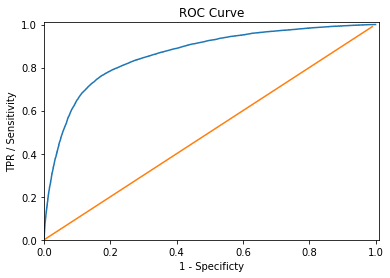

In [158]:
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_RL['fpr'],df_RL['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

In [165]:
from sklearn.metrics import auc
print('AUC=', auc(fpr_log, tpr_log))

AUC= 0.8621163536743957


In [164]:
coef=pd.DataFrame(X_ga.columns,columns=['Feature'])
coef['ponderador']=modelo.coef_.reshape(97,1)

In [162]:
coef.sort_values(by='ponderador',ascending=False)

,Feature,ponderador
0,prod_año_anterior,1.569554
4,"edad_(20, 30]",0.893978
42,clase_cargo_docente_Asistente principal,0.761706
66,clase_cargo_docente_Docente Adscripto,0.698588
45,clase_cargo_docente_Auxiliar de segunda categoría,0.616176
47,clase_cargo_docente_Auxiliar docente adscripto,0.550232
83,clase_cargo_docente_Profesor invitado,0.521331
40,clase_cargo_docente_Asistente nivel D-1,0.500394
5,"edad_(30, 40]",0.477433
24,grado_acad_Universitario de posgrado/doctorado,0.472226
